# Minimal DDIM (CIFAR-10) with Adam

In [1]:
# Imports
from pathlib import Path
import torch
from torch.utils.data import DataLoader
from torchvision import transforms, datasets, utils
import matplotlib.pyplot as plt
import sys, os
sys.path.append(os.path.abspath(os.path.join('..')))

# Import implementation
from implementations.v_parametrization import (
    DiffusionSchedule, UNet, v_param_sample_loop, v_param_train_ddim)

# import numpy as np
# import random
# seed = 0
# random.seed(seed)
# np.random.seed(seed)
# torch.manual_seed(seed)
# torch.cuda.manual_seed_all(seed)

# # Deterministic operations (Optional but recommended for exact reproducibility)
# # Note: This might make training slower. If speed is priority, keep benchmark=True
# torch.backends.cudnn.deterministic = True
# torch.backends.cudnn.benchmark = False

print('torch:', torch.__version__)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('device ->', device)

torch: 2.9.0+cu126
device -> cuda
torch: 2.9.0+cu126
device -> cuda


In [2]:
# CIFAR-10 data loaders
def get_dataloaders(batch_size=128, img_size=32, num_workers=4):
    transform = transforms.Compose([
        transforms.Resize(img_size),
        transforms.ToTensor(),
        transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5)),  # map to [-1,1]
    ])
    train_ds = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
    test_ds = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
    train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=num_workers, pin_memory=True)
    test_loader = DataLoader(test_ds, batch_size=batch_size, shuffle=False, num_workers=num_workers, pin_memory=True)
    return train_loader, test_loader

train_loader, test_loader = get_dataloaders(batch_size=128, img_size=32, num_workers=2)

In [3]:
# Helper to show saved sample grid
from PIL import Image
def show_image(path, figsize=(6,6)):
    img = Image.open(path)
    plt.figure(figsize=figsize)
    plt.imshow(img)
    plt.axis('off')
    plt.show()


In [ ]:
# WARNING: Training DDIM on CIFAR-10 is moderately heavy. Reduce epochs or timesteps for quick tests.
timesteps = 1000  # use 1000 for standard DDIM training; reduce for inference
model = UNet(in_ch=3, base_ch=64, time_emb_dim=64)
schedule = DiffusionSchedule(timesteps=timesteps, device=device)
print(f'Model parameters: {sum(p.numel() for p in model.parameters())/1e6:.2f}M')

v_param_train_ddim(
    model, schedule, train_loader, device,
    epochs=100,
    lr=2e-4,
    save_dir='./runs_ddim_test_v_parametrization'
)

Model parameters: 8.22M
Compiling model...


Epoch 1/100: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s, loss=0.1627, lr=0.00020]


End epoch 1, avg loss 0.2042


DDIM Sampling: 100%|██████████| 100/100 [00:02<00:00, 34.03it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_1.png


Epoch 2/100: 100%|██████████| 391/391 [00:28<00:00, 13.82it/s, loss=0.1389, lr=0.00020]


End epoch 2, avg loss 0.1502


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 159.89it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_2.png


Epoch 3/100: 100%|██████████| 391/391 [00:28<00:00, 13.90it/s, loss=0.1331, lr=0.00020]


End epoch 3, avg loss 0.1380


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 164.10it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_3.png


Epoch 4/100: 100%|██████████| 391/391 [00:28<00:00, 13.69it/s, loss=0.1276, lr=0.00020]


End epoch 4, avg loss 0.1308


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 158.48it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_4.png


Epoch 5/100: 100%|██████████| 391/391 [00:28<00:00, 13.50it/s, loss=0.1382, lr=0.00020]


End epoch 5, avg loss 0.1270


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 161.15it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_5.png


Epoch 6/100: 100%|██████████| 391/391 [00:29<00:00, 13.42it/s, loss=0.1103, lr=0.00020]


End epoch 6, avg loss 0.1250


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 158.69it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_6.png


Epoch 7/100: 100%|██████████| 391/391 [00:29<00:00, 13.18it/s, loss=0.1136, lr=0.00020]


End epoch 7, avg loss 0.1235


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 157.42it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_7.png


Epoch 8/100: 100%|██████████| 391/391 [00:29<00:00, 13.30it/s, loss=0.1293, lr=0.00020]


End epoch 8, avg loss 0.1217


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 155.75it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_8.png


Epoch 9/100: 100%|██████████| 391/391 [00:30<00:00, 12.94it/s, loss=0.1260, lr=0.00020]


End epoch 9, avg loss 0.1198


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 158.06it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_9.png


Epoch 10/100: 100%|██████████| 391/391 [00:30<00:00, 12.94it/s, loss=0.1327, lr=0.00020]


End epoch 10, avg loss 0.1194


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 153.00it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_10.png


Epoch 11/100: 100%|██████████| 391/391 [00:30<00:00, 12.91it/s, loss=0.1171, lr=0.00019]


End epoch 11, avg loss 0.1188


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 156.30it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_11.png


Epoch 12/100: 100%|██████████| 391/391 [00:30<00:00, 12.95it/s, loss=0.1172, lr=0.00019]


End epoch 12, avg loss 0.1177


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 154.64it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_12.png


Epoch 13/100: 100%|██████████| 391/391 [00:30<00:00, 12.82it/s, loss=0.1167, lr=0.00019]


End epoch 13, avg loss 0.1166


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 157.70it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_13.png


Epoch 14/100: 100%|██████████| 391/391 [00:31<00:00, 12.49it/s, loss=0.1224, lr=0.00019]


End epoch 14, avg loss 0.1163


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 142.63it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_14.png


Epoch 15/100: 100%|██████████| 391/391 [00:31<00:00, 12.34it/s, loss=0.1253, lr=0.00019]


End epoch 15, avg loss 0.1159


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 141.32it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_15.png


Epoch 16/100: 100%|██████████| 391/391 [00:31<00:00, 12.54it/s, loss=0.1173, lr=0.00019]


End epoch 16, avg loss 0.1160


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 159.03it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_16.png


Epoch 17/100: 100%|██████████| 391/391 [00:29<00:00, 13.10it/s, loss=0.1194, lr=0.00019]


End epoch 17, avg loss 0.1152


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 148.87it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_17.png


Epoch 18/100: 100%|██████████| 391/391 [00:31<00:00, 12.54it/s, loss=0.1253, lr=0.00018]


End epoch 18, avg loss 0.1155


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 149.03it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_18.png


Epoch 19/100: 100%|██████████| 391/391 [00:31<00:00, 12.32it/s, loss=0.1105, lr=0.00018]


End epoch 19, avg loss 0.1147


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 145.65it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_19.png


Epoch 20/100: 100%|██████████| 391/391 [00:30<00:00, 12.70it/s, loss=0.1121, lr=0.00018]


End epoch 20, avg loss 0.1135


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 133.96it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_20.png


Epoch 21/100: 100%|██████████| 391/391 [00:30<00:00, 12.64it/s, loss=0.1231, lr=0.00018]


End epoch 21, avg loss 0.1139


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 155.51it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_21.png


Epoch 22/100: 100%|██████████| 391/391 [00:30<00:00, 12.86it/s, loss=0.1012, lr=0.00018]


End epoch 22, avg loss 0.1139


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 158.55it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_22.png


Epoch 23/100: 100%|██████████| 391/391 [00:30<00:00, 12.70it/s, loss=0.1183, lr=0.00018]


End epoch 23, avg loss 0.1128


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 156.71it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_23.png


Epoch 24/100: 100%|██████████| 391/391 [00:30<00:00, 12.93it/s, loss=0.1372, lr=0.00017]


End epoch 24, avg loss 0.1136


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 156.25it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_24.png


Epoch 25/100: 100%|██████████| 391/391 [00:30<00:00, 12.76it/s, loss=0.1145, lr=0.00017]


End epoch 25, avg loss 0.1130


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 158.18it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_25.png


Epoch 26/100: 100%|██████████| 391/391 [00:30<00:00, 12.93it/s, loss=0.1173, lr=0.00017]


End epoch 26, avg loss 0.1132


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 137.10it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_26.png


Epoch 27/100: 100%|██████████| 391/391 [00:31<00:00, 12.48it/s, loss=0.1081, lr=0.00017]


End epoch 27, avg loss 0.1126


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 138.13it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_27.png


Epoch 28/100: 100%|██████████| 391/391 [00:31<00:00, 12.47it/s, loss=0.1169, lr=0.00016]


End epoch 28, avg loss 0.1123


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 144.99it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_28.png


Epoch 29/100: 100%|██████████| 391/391 [00:31<00:00, 12.25it/s, loss=0.1281, lr=0.00016]


End epoch 29, avg loss 0.1125


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 154.16it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_29.png


Epoch 30/100: 100%|██████████| 391/391 [00:30<00:00, 12.64it/s, loss=0.1135, lr=0.00016]


End epoch 30, avg loss 0.1128


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 157.06it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_30.png


Epoch 31/100: 100%|██████████| 391/391 [00:30<00:00, 12.88it/s, loss=0.1103, lr=0.00016]


End epoch 31, avg loss 0.1120


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 157.13it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_31.png


Epoch 32/100: 100%|██████████| 391/391 [00:35<00:00, 11.00it/s, loss=0.0997, lr=0.00015]


End epoch 32, avg loss 0.1114


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 151.65it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_32.png


Epoch 33/100: 100%|██████████| 391/391 [00:30<00:00, 12.63it/s, loss=0.1114, lr=0.00015]


End epoch 33, avg loss 0.1115


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 155.79it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_33.png


Epoch 34/100: 100%|██████████| 391/391 [00:31<00:00, 12.55it/s, loss=0.1129, lr=0.00015]


End epoch 34, avg loss 0.1120


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 155.84it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_34.png


Epoch 35/100: 100%|██████████| 391/391 [00:31<00:00, 12.47it/s, loss=0.1015, lr=0.00015]


End epoch 35, avg loss 0.1120


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 143.61it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_35.png


Epoch 36/100: 100%|██████████| 391/391 [00:31<00:00, 12.51it/s, loss=0.1065, lr=0.00014]


End epoch 36, avg loss 0.1114


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 136.94it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_36.png


Epoch 37/100: 100%|██████████| 391/391 [00:31<00:00, 12.31it/s, loss=0.1029, lr=0.00014]


End epoch 37, avg loss 0.1112


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 154.58it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_37.png


Epoch 38/100: 100%|██████████| 391/391 [00:30<00:00, 12.73it/s, loss=0.1104, lr=0.00014]


End epoch 38, avg loss 0.1116


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 136.18it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_38.png


Epoch 39/100: 100%|██████████| 391/391 [00:31<00:00, 12.47it/s, loss=0.1068, lr=0.00013]


End epoch 39, avg loss 0.1111


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 140.88it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_39.png


Epoch 40/100: 100%|██████████| 391/391 [00:30<00:00, 12.66it/s, loss=0.1044, lr=0.00013]


End epoch 40, avg loss 0.1107


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 137.07it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_40.png


Epoch 41/100: 100%|██████████| 391/391 [00:31<00:00, 12.45it/s, loss=0.1058, lr=0.00013]


End epoch 41, avg loss 0.1111


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 125.81it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_41.png


Epoch 42/100: 100%|██████████| 391/391 [00:31<00:00, 12.35it/s, loss=0.1055, lr=0.00013]


End epoch 42, avg loss 0.1110


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 156.01it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_42.png


Epoch 43/100: 100%|██████████| 391/391 [00:30<00:00, 12.64it/s, loss=0.1010, lr=0.00012]


End epoch 43, avg loss 0.1112


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 159.45it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_43.png


Epoch 44/100: 100%|██████████| 391/391 [00:31<00:00, 12.40it/s, loss=0.1117, lr=0.00012]


End epoch 44, avg loss 0.1104


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 154.75it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_44.png


Epoch 45/100: 100%|██████████| 391/391 [00:31<00:00, 12.36it/s, loss=0.1107, lr=0.00012]


End epoch 45, avg loss 0.1109


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 153.78it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_45.png


Epoch 46/100: 100%|██████████| 391/391 [00:30<00:00, 12.84it/s, loss=0.1101, lr=0.00011]


End epoch 46, avg loss 0.1106


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 140.25it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_46.png


Epoch 47/100: 100%|██████████| 391/391 [00:31<00:00, 12.26it/s, loss=0.1095, lr=0.00011]


End epoch 47, avg loss 0.1100


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 133.33it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_47.png


Epoch 48/100: 100%|██████████| 391/391 [00:31<00:00, 12.34it/s, loss=0.1120, lr=0.00011]


End epoch 48, avg loss 0.1108


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 148.65it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_48.png


Epoch 49/100: 100%|██████████| 391/391 [00:31<00:00, 12.31it/s, loss=0.1170, lr=0.00010]


End epoch 49, avg loss 0.1103


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 126.22it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_49.png


Epoch 50/100: 100%|██████████| 391/391 [00:31<00:00, 12.30it/s, loss=0.1197, lr=0.00010]


End epoch 50, avg loss 0.1100


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 134.82it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_50.png


Epoch 51/100: 100%|██████████| 391/391 [00:30<00:00, 12.77it/s, loss=0.1099, lr=0.00010]


End epoch 51, avg loss 0.1099


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 137.87it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_51.png


Epoch 52/100: 100%|██████████| 391/391 [00:30<00:00, 13.03it/s, loss=0.1080, lr=0.00009]


End epoch 52, avg loss 0.1097


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 160.19it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_52.png


Epoch 53/100: 100%|██████████| 391/391 [00:29<00:00, 13.12it/s, loss=0.1103, lr=0.00009]


End epoch 53, avg loss 0.1102


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 157.84it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_53.png


Epoch 54/100: 100%|██████████| 391/391 [00:29<00:00, 13.17it/s, loss=0.1111, lr=0.00009]


End epoch 54, avg loss 0.1101


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 159.20it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_54.png


Epoch 55/100: 100%|██████████| 391/391 [00:29<00:00, 13.19it/s, loss=0.0988, lr=0.00008]


End epoch 55, avg loss 0.1096


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 158.70it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_55.png


Epoch 56/100: 100%|██████████| 391/391 [00:29<00:00, 13.18it/s, loss=0.0978, lr=0.00008]


End epoch 56, avg loss 0.1090


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 158.09it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_56.png


Epoch 57/100: 100%|██████████| 391/391 [00:29<00:00, 13.18it/s, loss=0.1201, lr=0.00008]


End epoch 57, avg loss 0.1098


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 156.88it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_57.png


Epoch 58/100: 100%|██████████| 391/391 [00:29<00:00, 13.20it/s, loss=0.1198, lr=0.00008]


End epoch 58, avg loss 0.1096


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 156.97it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_58.png


Epoch 59/100: 100%|██████████| 391/391 [00:29<00:00, 13.14it/s, loss=0.1042, lr=0.00007]


End epoch 59, avg loss 0.1100


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 154.74it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_59.png


Epoch 60/100: 100%|██████████| 391/391 [00:29<00:00, 13.16it/s, loss=0.1193, lr=0.00007]


End epoch 60, avg loss 0.1098


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 159.84it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_60.png


Epoch 61/100: 100%|██████████| 391/391 [00:29<00:00, 13.09it/s, loss=0.1068, lr=0.00007]


End epoch 61, avg loss 0.1089


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 160.71it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_61.png


Epoch 62/100: 100%|██████████| 391/391 [00:29<00:00, 13.17it/s, loss=0.1156, lr=0.00006]


End epoch 62, avg loss 0.1094


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 159.18it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_62.png


Epoch 63/100: 100%|██████████| 391/391 [00:29<00:00, 13.21it/s, loss=0.1164, lr=0.00006]


End epoch 63, avg loss 0.1095


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 159.65it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_63.png


Epoch 64/100: 100%|██████████| 391/391 [00:29<00:00, 13.18it/s, loss=0.1219, lr=0.00006]


End epoch 64, avg loss 0.1092


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 160.78it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_64.png


Epoch 65/100: 100%|██████████| 391/391 [00:29<00:00, 13.22it/s, loss=0.1041, lr=0.00005]


End epoch 65, avg loss 0.1094


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 161.81it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_65.png


Epoch 66/100: 100%|██████████| 391/391 [00:29<00:00, 13.15it/s, loss=0.1028, lr=0.00005]


End epoch 66, avg loss 0.1095


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 158.21it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_66.png


Epoch 67/100: 100%|██████████| 391/391 [00:29<00:00, 13.13it/s, loss=0.1087, lr=0.00005]


End epoch 67, avg loss 0.1091


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 158.99it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_67.png


Epoch 68/100: 100%|██████████| 391/391 [00:29<00:00, 13.24it/s, loss=0.1070, lr=0.00005]


End epoch 68, avg loss 0.1090


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 157.01it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_68.png


Epoch 69/100: 100%|██████████| 391/391 [00:30<00:00, 12.93it/s, loss=0.1044, lr=0.00004]


End epoch 69, avg loss 0.1091


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 141.42it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_69.png


Epoch 70/100: 100%|██████████| 391/391 [00:30<00:00, 12.65it/s, loss=0.1056, lr=0.00004]


End epoch 70, avg loss 0.1086


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 155.83it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_70.png


Epoch 71/100: 100%|██████████| 391/391 [00:30<00:00, 12.70it/s, loss=0.1034, lr=0.00004]


End epoch 71, avg loss 0.1087


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 154.04it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_71.png


Epoch 72/100: 100%|██████████| 391/391 [00:30<00:00, 13.02it/s, loss=0.1127, lr=0.00004]


End epoch 72, avg loss 0.1082


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 156.76it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_72.png


Epoch 73/100: 100%|██████████| 391/391 [00:29<00:00, 13.10it/s, loss=0.0984, lr=0.00003]


End epoch 73, avg loss 0.1090


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 159.14it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_73.png


Epoch 74/100: 100%|██████████| 391/391 [00:30<00:00, 13.01it/s, loss=0.1056, lr=0.00003]


End epoch 74, avg loss 0.1085


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 145.89it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_74.png


Epoch 75/100: 100%|██████████| 391/391 [00:30<00:00, 12.80it/s, loss=0.1083, lr=0.00003]


End epoch 75, avg loss 0.1086


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 142.28it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_75.png


Epoch 76/100: 100%|██████████| 391/391 [00:31<00:00, 12.38it/s, loss=0.1126, lr=0.00003]


End epoch 76, avg loss 0.1090


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 140.21it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_76.png


Epoch 77/100: 100%|██████████| 391/391 [00:31<00:00, 12.37it/s, loss=0.1104, lr=0.00003]


End epoch 77, avg loss 0.1085


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 139.71it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_77.png


Epoch 78/100: 100%|██████████| 391/391 [00:30<00:00, 12.79it/s, loss=0.0986, lr=0.00002]


End epoch 78, avg loss 0.1090


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 159.69it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_78.png


Epoch 79/100: 100%|██████████| 391/391 [00:29<00:00, 13.21it/s, loss=0.1126, lr=0.00002]


End epoch 79, avg loss 0.1087


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 161.69it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_79.png


Epoch 80/100: 100%|██████████| 391/391 [00:29<00:00, 13.19it/s, loss=0.0992, lr=0.00002]


End epoch 80, avg loss 0.1091


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 160.65it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_80.png


Epoch 81/100: 100%|██████████| 391/391 [00:29<00:00, 13.18it/s, loss=0.1084, lr=0.00002]


End epoch 81, avg loss 0.1088


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 161.39it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_81.png


Epoch 82/100: 100%|██████████| 391/391 [00:29<00:00, 13.14it/s, loss=0.1153, lr=0.00002]


End epoch 82, avg loss 0.1082


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 158.81it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_82.png


Epoch 83/100: 100%|██████████| 391/391 [00:30<00:00, 12.86it/s, loss=0.1101, lr=0.00001]


End epoch 83, avg loss 0.1078


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 154.43it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_83.png


Epoch 84/100: 100%|██████████| 391/391 [00:30<00:00, 12.74it/s, loss=0.1062, lr=0.00001]


End epoch 84, avg loss 0.1083


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 158.40it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_84.png


Epoch 85/100: 100%|██████████| 391/391 [00:30<00:00, 12.92it/s, loss=0.1095, lr=0.00001]


End epoch 85, avg loss 0.1083


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 147.90it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_85.png


Epoch 86/100: 100%|██████████| 391/391 [00:30<00:00, 12.89it/s, loss=0.1086, lr=0.00001]


End epoch 86, avg loss 0.1084


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 160.11it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_86.png


Epoch 87/100: 100%|██████████| 391/391 [00:30<00:00, 12.69it/s, loss=0.1130, lr=0.00001]


End epoch 87, avg loss 0.1081


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 138.47it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_87.png


Epoch 88/100: 100%|██████████| 391/391 [00:31<00:00, 12.35it/s, loss=0.1035, lr=0.00001]


End epoch 88, avg loss 0.1083


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 154.47it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_88.png


Epoch 89/100: 100%|██████████| 391/391 [00:31<00:00, 12.45it/s, loss=0.1007, lr=0.00001]


End epoch 89, avg loss 0.1086


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 143.92it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_89.png


Epoch 90/100: 100%|██████████| 391/391 [00:30<00:00, 12.75it/s, loss=0.1097, lr=0.00001]


End epoch 90, avg loss 0.1082


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 154.40it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_90.png


Epoch 91/100: 100%|██████████| 391/391 [00:31<00:00, 12.56it/s, loss=0.1176, lr=0.00000]


End epoch 91, avg loss 0.1079


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 138.00it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_91.png


Epoch 92/100: 100%|██████████| 391/391 [00:31<00:00, 12.33it/s, loss=0.0988, lr=0.00000]


End epoch 92, avg loss 0.1079


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 138.08it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_92.png


Epoch 93/100: 100%|██████████| 391/391 [00:31<00:00, 12.48it/s, loss=0.1042, lr=0.00000]


End epoch 93, avg loss 0.1083


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 143.00it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_93.png


Epoch 94/100: 100%|██████████| 391/391 [00:30<00:00, 12.63it/s, loss=0.1195, lr=0.00000]


End epoch 94, avg loss 0.1080


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 145.99it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_94.png


Epoch 95/100: 100%|██████████| 391/391 [00:30<00:00, 12.72it/s, loss=0.1089, lr=0.00000]


End epoch 95, avg loss 0.1084


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 157.98it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_95.png


Epoch 96/100: 100%|██████████| 391/391 [00:30<00:00, 12.80it/s, loss=0.1092, lr=0.00000]


End epoch 96, avg loss 0.1086


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 156.05it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_96.png


Epoch 97/100: 100%|██████████| 391/391 [00:30<00:00, 12.63it/s, loss=0.1107, lr=0.00000]


End epoch 97, avg loss 0.1077


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 136.81it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_97.png


Epoch 98/100: 100%|██████████| 391/391 [00:30<00:00, 12.67it/s, loss=0.1020, lr=0.00000]


End epoch 98, avg loss 0.1088


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 141.94it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_98.png


Epoch 99/100: 100%|██████████| 391/391 [00:31<00:00, 12.59it/s, loss=0.0985, lr=0.00000]


End epoch 99, avg loss 0.1083


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 155.88it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_99.png


Epoch 100/100: 100%|██████████| 391/391 [00:30<00:00, 12.82it/s, loss=0.0946, lr=0.00000]


End epoch 100, avg loss 0.1084


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 100.41it/s]


Saved samples to runs_ddim_test_v_parametrization/samples_epoch_100.png
Notebook set up. To begin training, call train_ddim(...) as shown above.


DDIM Sampling: 100%|██████████| 50/50 [00:00<00:00, 66.04it/s]


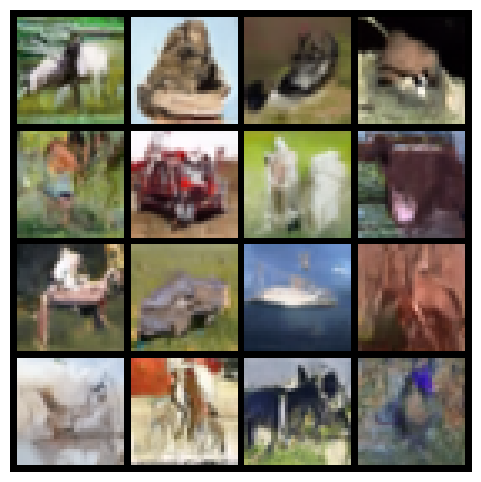

In [5]:
# Load a checkpoint and generate samples (example)
ckpt_path = './runs_ddim_test_v_parametrization/checkpoint_epoch_100.pt'  # adjust to your path
if Path(ckpt_path).exists():
    ckpt = torch.load(ckpt_path, map_location=device)
    state_dict = ckpt['model_state']

    new_state_dict = {}
    for k, v in state_dict.items():
        if k.startswith('_orig_mod.'):
            new_state_dict[k.replace('_orig_mod.', '')] = v
        else:
            new_state_dict[k] = v

    model.load_state_dict(new_state_dict)
    model.to(device).eval()
    samples = v_param_sample_loop(model, schedule, (16,3,32,32), device=device)
    grid = (samples.clamp(-1,1) + 1) / 2.0
    utils.save_image(grid, 'sample_from_ckpt.png', nrow=4)
    show_image('sample_from_ckpt.png')
else:
    print('No checkpoint found at', ckpt_path)


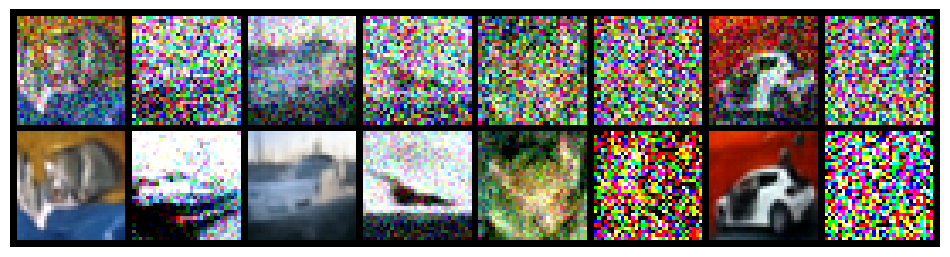

In [6]:
# Short diagnostic: take a test batch, add noise at random t, and visualize noisy vs. denoised (single-step prediction)
loader = test_loader
x, _ = next(iter(loader))
x = x[:8].to(device)
t = torch.randint(0, schedule.timesteps, (x.shape[0],), device=device)
noise = torch.randn_like(x)
x_noisy = schedule.q_sample(x, t, noise=noise)
with torch.no_grad():
    pred_noise = model(x_noisy, t)
    x0_pred = (x_noisy - schedule.sqrt_one_minus_alphas_cumprod[t].view(-1,1,1,1) * pred_noise) / schedule.sqrt_alphas_cumprod[t].view(-1,1,1,1)
    x0_pred = x0_pred.clamp(-1,1)
# show noisy and denoised pairs
pairs = torch.cat([x_noisy[:8], x0_pred[:8]], dim=0)
grid = (pairs + 1)/2.0
utils.save_image(grid, 'diagnostic_pairs.png', nrow=8)
show_image('diagnostic_pairs.png', figsize=(12,4))
